# Week 11 Homework


## 1. What scale of measurement applies to timeseries data? 
The scale of measurement that applies to timeseries data is Interval Scale. 
### Is timeseries data continuous or discrete? Why?
Timeseries data can be either. It depends on how the data is being recorded. It is continuous when observations are made continuously through time and is discrete when observations are taken only at specific times, usually equally spaced.

## 2. What does ARIMA stand for? Break down and explain each piece in the name.

ARIMA stands for auto-regressive integrated moving average

Autoregression (AR) - past values are used to predict future ones, correlation between past and future

Order of Integration (I) - used to make a series stationary

Moving average (MA) - helps smooth out data over a particular time period by creating a constantly averaged value

## 3. Using the data in the temperatures/ folder. Write a function that efficiently converts every column to a different temperature scale: one that is more common than Kelvin.

In [1]:
# set up and read in csv file
import numpy as np
import pandas as pd

df = pd.read_csv('temperature.csv',parse_dates=True,index_col='datetime')
#df = pd.read_csv('temperature.csv')
df.head()


,Vancouver,Portland,San Francisco,Seattle,Los Angeles,San Diego,Las Vegas,Phoenix,Albuquerque,Denver,...,Philadelphia,New York,Montreal,Boston,Beersheba,Tel Aviv District,Eilat,Haifa,Nahariyya,Jerusalem
datetime,,,,,,,,,,,,,,,,,,,,,
2012-10-01 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,309.100000,NaN,NaN,NaN
2012-10-01 13:00:00,284.630000,282.080000,289.480000,281.800000,291.870000,291.530000,293.410000,296.600000,285.120000,284.610000,...,285.630000,288.220000,285.830000,287.170000,307.590000,305.470000,310.580000,304.4,304.4,303.5
2012-10-01 14:00:00,284.629041,282.083252,289.474993,281.797217,291.868185,291.533501,293.403141,296.608509,285.154558,284.607305,...,285.663208,288.247676,285.834650,287.186092,307.590000,304.310000,310.495769,304.4,304.4,303.5
2012-10-01 15:00:00,284.626998,282.091866,289.460618,281.789833,291.862844,291.543355,293.392177,296.631487,285.233952,284.599918,...,285.756824,288.326940,285.847789,287.231672,307.391513,304.281841,310.411539,304.4,304.4,303.5
2012-10-01 16:00:00,284.624955,282.100481,289.446243,281.782449,291.857503,291.553209,293.381213,296.654466,285.313345,284.592530,...,285.850440,288.406203,285.860929,287.277251,307.145200,304.238015,310.327308,304.4,304.4,303.5


In [2]:
# create new dataframe to manipulate

new_df = df
new_df.columns


Index(['Vancouver', 'Portland', 'San Francisco', 'Seattle', 'Los Angeles',
       'San Diego', 'Las Vegas', 'Phoenix', 'Albuquerque', 'Denver',
       'San Antonio', 'Dallas', 'Houston', 'Kansas City', 'Minneapolis',
       'Saint Louis', 'Chicago', 'Nashville', 'Indianapolis', 'Atlanta',
       'Detroit', 'Jacksonville', 'Charlotte', 'Miami', 'Pittsburgh',
       'Toronto', 'Philadelphia', 'New York', 'Montreal', 'Boston',
       'Beersheba', 'Tel Aviv District', 'Eilat', 'Haifa', 'Nahariyya',
       'Jerusalem'],
      dtype='object')

In [3]:
#function to convert from kelvin to celsius
def kelvintocelsius(temp):
    cel=0
    try:
        cel = temp - 273.15
        return cel
    except Exception as e:
        return 0
    

In [4]:
#check to see if function works
kelvintocelsius(new_df['Vancouver'])

datetime
2012-10-01 12:00:00          NaN
2012-10-01 13:00:00    11.480000
2012-10-01 14:00:00    11.479041
2012-10-01 15:00:00    11.476998
2012-10-01 16:00:00    11.474955
                         ...    
2017-11-29 20:00:00          NaN
2017-11-29 21:00:00          NaN
2017-11-29 22:00:00          NaN
2017-11-29 23:00:00          NaN
2017-11-30 00:00:00          NaN
Name: Vancouver, Length: 45253, dtype: float64

In [5]:
#Using the new dataframe and the applymap function, call my conversion function and apply to all temps in the dataframe, 
# printing the head to validate it worked.
new_df= new_df.applymap(kelvintocelsius, na_action='ignore')
new_df.head()

,Vancouver,Portland,San Francisco,Seattle,Los Angeles,San Diego,Las Vegas,Phoenix,Albuquerque,Denver,...,Philadelphia,New York,Montreal,Boston,Beersheba,Tel Aviv District,Eilat,Haifa,Nahariyya,Jerusalem
datetime,,,,,,,,,,,,,,,,,,,,,
2012-10-01 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,35.950000,NaN,NaN,NaN
2012-10-01 13:00:00,11.480000,8.930000,16.330000,8.650000,18.720000,18.380000,20.260000,23.450000,11.970000,11.460000,...,12.480000,15.070000,12.680000,14.020000,34.440000,32.320000,37.430000,31.25,31.25,30.35
2012-10-01 14:00:00,11.479041,8.933252,16.324993,8.647217,18.718186,18.383501,20.253141,23.458509,12.004558,11.457306,...,12.513208,15.097676,12.684650,14.036092,34.440000,31.160000,37.345769,31.25,31.25,30.35
2012-10-01 15:00:00,11.476998,8.941867,16.310618,8.639833,18.712845,18.393355,20.242177,23.481487,12.083952,11.449918,...,12.606824,15.176940,12.697789,14.081672,34.241513,31.131841,37.261539,31.25,31.25,30.35
2012-10-01 16:00:00,11.474955,8.950481,16.296243,8.632449,18.707503,18.403209,20.231213,23.504466,12.163345,11.442530,...,12.700441,15.256203,12.710929,14.127251,33.995200,31.088015,37.177308,31.25,31.25,30.35


Another option for looping through the dataframe that I was considering for #3

### Was looking at using a for loop to go through all of the columns and rows
for index in range(len(new_df)):
    temp = new_df.iloc[:,:index]
    


## 4. Write a function that efficiently fills in missing values in every column, excluding trailing NANs. That is: if there's temperature data on either side of a timestamp, it should interpolate through it. But if data stopped being collected, your function should leave nans at the end.

In [6]:
# Create dataframe with nulls
res = new_df.isnull()


In [7]:
# Write a function to fill in missing values for every column, except for trailing nans. Checking the row before and after
# to determine if data just stopped being collected.

def replacenans(col):
    try:
        for row in range(0,36):
            if res.iloc[row,col] == True:
                
                if row != 0:
                    if res.iloc[row+1,col] == True and res.iloc[row-1,col] == True:
                         # do not replace anything here
                        return
                    else:
                        new_df.iloc[row,col] = 0
                        #one of the values (before or after) were not null so replace with 0
                        return
                    
                elif res.iloc[row+1,col] == True:
                     #on first row, so checking second row to see if null, if so, not replacing
                        return
                else:
                    new_df.iloc[row,col] = 0
                    #ok to replace since second row was not null
                    return
            else:
                print(row,col)
                return
        
  
    except Exception as e:
        return

In [8]:
# print head and tail before running function
print(new_df.head())
print(new_df.tail())

                     Vancouver  Portland  San Francisco   Seattle  \
datetime                                                            
2012-10-01 12:00:00        NaN       NaN            NaN       NaN   
2012-10-01 13:00:00  11.480000  8.930000      16.330000  8.650000   
2012-10-01 14:00:00  11.479041  8.933252      16.324993  8.647217   
2012-10-01 15:00:00  11.476998  8.941867      16.310618  8.639833   
2012-10-01 16:00:00  11.474955  8.950481      16.296243  8.632449   

                     Los Angeles  San Diego  Las Vegas    Phoenix  \
datetime                                                            
2012-10-01 12:00:00          NaN        NaN        NaN        NaN   
2012-10-01 13:00:00    18.720000  18.380000  20.260000  23.450000   
2012-10-01 14:00:00    18.718186  18.383501  20.253141  23.458509   
2012-10-01 15:00:00    18.712845  18.393355  20.242177  23.481487   
2012-10-01 16:00:00    18.707503  18.403209  20.231213  23.504466   

                     Albuquerque

In [9]:
# 45253 rows exist - Call function for each row in dataframe

for index in range(len(new_df)):
    replacenans(index)
   

0 32


In [10]:
# print head and tail after running function
print(new_df.head())
print(new_df.tail())

                     Vancouver  Portland  San Francisco   Seattle  \
datetime                                                            
2012-10-01 12:00:00   0.000000  0.000000       0.000000  0.000000   
2012-10-01 13:00:00  11.480000  8.930000      16.330000  8.650000   
2012-10-01 14:00:00  11.479041  8.933252      16.324993  8.647217   
2012-10-01 15:00:00  11.476998  8.941867      16.310618  8.639833   
2012-10-01 16:00:00  11.474955  8.950481      16.296243  8.632449   

                     Los Angeles  San Diego  Las Vegas    Phoenix  \
datetime                                                            
2012-10-01 12:00:00     0.000000   0.000000   0.000000   0.000000   
2012-10-01 13:00:00    18.720000  18.380000  20.260000  23.450000   
2012-10-01 14:00:00    18.718186  18.383501  20.253141  23.458509   
2012-10-01 15:00:00    18.712845  18.393355  20.242177  23.481487   
2012-10-01 16:00:00    18.707503  18.403209  20.231213  23.504466   

                     Albuquerque

## 5.	Find all cities A and B where city A is warmer than city B in the summer, but also colder than city B in the winter, on average.


In [11]:
#summer months June, July, August
#winter months December, January, February
#thoughts - group by months, create another dataframe with just the city name, average summer temp, average winter temp
#thought about using a dictionary but can't seem to get the setup correct
#di = new_df.to_dict(orient='series')
#for key, val in di.items():
#    for i in val:
#        print("{} : {}".format(key, i))

# added month to the dataframe to help manage this better
new_df['month'] = pd.DatetimeIndex(new_df.index).month

#groupby the month column and calculate average
month_groupby = new_df.groupby('month').mean()

In [12]:
# Create summer dataframe for the months of June, July and August, getting the combined mean for those 3 months 
summer_df1 = month_groupby[np.logical_and(month_groupby.index>5, month_groupby.index<9)].mean()
print(summer_df1)

# Create winter dataframe for the months of December, January and February, getting the combined mean for those 3 months 
winter_df1 = month_groupby[np.logical_or(month_groupby.index==12, month_groupby.index<3)].mean()
print(winter_df1)

Vancouver            18.103468
Portland             19.487353
San Francisco        18.729377
Seattle              18.174105
Los Angeles          22.457350
San Diego            21.073672
Las Vegas            31.507035
Phoenix              32.943638
Albuquerque          22.620570
Denver               20.723232
San Antonio          28.286011
Dallas               28.759078
Houston              28.307809
Kansas City          24.690057
Minneapolis          21.066875
Saint Louis          24.712634
Chicago              21.542115
Nashville            25.096131
Indianapolis         22.833263
Atlanta              25.211214
Detroit              21.485571
Jacksonville         27.326117
Charlotte            24.887312
Miami                28.143554
Pittsburgh           21.318742
Toronto              20.077820
Philadelphia         23.040380
New York             23.127671
Montreal             19.724518
Boston               21.129577
Beersheba            24.697751
Tel Aviv District    27.432373
Eilat   

In [13]:
# Concatenate summer and winter back together for ease of looping through for finding the correct cities
merged_df = pd.concat([summer_df1, winter_df1], axis=1)
print(merged_df)

                           0          1
Vancouver          18.103468   3.780224
Portland           19.487353   4.555758
San Francisco      18.729377  10.721528
Seattle            18.174105   4.887727
Los Angeles        22.457350  12.686145
San Diego          21.073672  12.626448
Las Vegas          31.507035   8.154022
Phoenix            32.943638  12.044535
Albuquerque        22.620570   2.209715
Denver             20.723232  -0.477753
San Antonio        28.286011  12.405100
Dallas             28.759078   9.442263
Houston            28.307809  13.377934
Kansas City        24.690057   1.030138
Minneapolis        21.066875  -7.601719
Saint Louis        24.712634   1.479268
Chicago            21.542115  -2.204811
Nashville          25.096131   5.367705
Indianapolis       22.833263  -0.498739
Atlanta            25.211214   7.809410
Detroit            21.485571  -2.481815
Jacksonville       27.326117  14.763055
Charlotte          24.887312   6.629287
Miami              28.143554  21.621057


In [14]:
# Rename the columns summer and winter
merged_df.columns = ["summer", "winter"]
print(merged_df)

                      summer     winter
Vancouver          18.103468   3.780224
Portland           19.487353   4.555758
San Francisco      18.729377  10.721528
Seattle            18.174105   4.887727
Los Angeles        22.457350  12.686145
San Diego          21.073672  12.626448
Las Vegas          31.507035   8.154022
Phoenix            32.943638  12.044535
Albuquerque        22.620570   2.209715
Denver             20.723232  -0.477753
San Antonio        28.286011  12.405100
Dallas             28.759078   9.442263
Houston            28.307809  13.377934
Kansas City        24.690057   1.030138
Minneapolis        21.066875  -7.601719
Saint Louis        24.712634   1.479268
Chicago            21.542115  -2.204811
Nashville          25.096131   5.367705
Indianapolis       22.833263  -0.498739
Atlanta            25.211214   7.809410
Detroit            21.485571  -2.481815
Jacksonville       27.326117  14.763055
Charlotte          24.887312   6.629287
Miami              28.143554  21.621057


In [15]:
# Verify how to access the data
print(merged_df.columns)
print(merged_df.index[0])
print(merged_df['summer'][0])

Index(['summer', 'winter'], dtype='object')
Vancouver
18.103467573428933


In [16]:
# Create holding lists for city a and city b
hold_city_a=[]
hold_city_b=[]
count=0

#loop through the merged dataframe, set the initial data up to use in next loop
for i in range(len(merged_df)):
    city =merged_df.index[i]
    summer_a = merged_df['summer'][i]
    winter_a = merged_df['winter'][i]
    
    for j in range(len(merged_df)): #loop through the merged dataframe to check summer and winter temps against held values
        if city !=merged_df.index[j]:
            if (summer_a>merged_df['summer'][j]) & (winter_a<merged_df['winter'][j]):
                hold_city_a.append(city)
                hold_city_b.append(merged_df.index[j])
                print(city, "temp.", summer_a, "is hotter than", merged_df.index[j],merged_df['summer'][j])
                print(city, "temp", winter_a, "is colder than", merged_df.index[j],merged_df['winter'][j])
                count +=1

print(count)


Portland temp. 19.48735256253945 is hotter than San Francisco 18.729377216751516
Portland temp 4.555757694846357 is colder than San Francisco 10.721528126080948
Portland temp. 19.48735256253945 is hotter than Seattle 18.17410452996562
Portland temp 4.555757694846357 is colder than Seattle 4.887727411167566
Las Vegas temp. 31.507034527953724 is hotter than San Francisco 18.729377216751516
Las Vegas temp 8.154021627501866 is colder than San Francisco 10.721528126080948
Las Vegas temp. 31.507034527953724 is hotter than Los Angeles 22.457350002756893
Las Vegas temp 8.154021627501866 is colder than Los Angeles 12.686144714885124
Las Vegas temp. 31.507034527953724 is hotter than San Diego 21.07367154191549
Las Vegas temp 8.154021627501866 is colder than San Diego 12.626447817438887
Las Vegas temp. 31.507034527953724 is hotter than San Antonio 28.286010787772124
Las Vegas temp 8.154021627501866 is colder than San Antonio 12.40510021351492
Las Vegas temp. 31.507034527953724 is hotter than Dall

## 6.	For two of the cities you found in question 5 (there are many possible answers), clean up the data via rolling averages and plot a clear visual. Explain how rolling average differs from moving average (MA) model.


MA model uses past AND current errors to estimate the current value. The rolling average does not take current errors into account.

That is kind of confusing though since the research I did indicates that the terms Moving, Rolling, and Trailing are commonly used to describe the same calculation idea…that we want to operate on the previous certain number of data rows. 


In [17]:
#pick 2 cities to use from previous question
print(hold_city_a[20])
print(hold_city_b[20])

Phoenix
Jacksonville


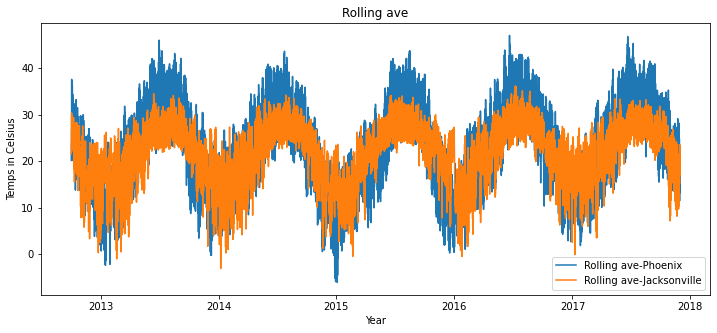

In [18]:
# import the libraries
import seaborn as sns
import matplotlib.pyplot as plt

#df.rolling() method
# computing a 7 day rolling average
new_df['7dayPhoenix'] = new_df.Phoenix.rolling(7).mean()

new_df['7dayJacksonville'] = new_df.Jacksonville.rolling(7).mean()


# set figure size
plt.figure( figsize = ( 12, 5))
  
# plot a simple time series plot
# plot using rolling average
sns.lineplot(x = 'datetime',
             y = '7dayPhoenix',
             data = new_df,
             label = 'Rolling ave-Phoenix')

# plot using rolling average
sns.lineplot(x = 'datetime',
             y = '7dayJacksonville',
             data = new_df,
             label = 'Rolling ave-Jacksonville')
  
plt.title('Rolling ave')
  
plt.xlabel('Year')
plt.ylabel('Temps in Celsius')
plt.show()

## 7.	Perform SARIMA on five cities, iterating through the cities programmatically. Explain your results.
 ### a.	Graph the predicted values 30 days out.


In [19]:
# import statsmodels
# Try this on one first - believe I need to do the ACF and PACF on the city to get the ARMA values to be used in SARIMA
# plan to create a function or loop that can run on 5 random cities
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import warnings
warnings.filterwarnings('ignore')
#useful to set equal to 'once'
from scipy.stats import norm
import matplotlib.pyplot as plt
from datetime import datetime
import requests
import os
from statsmodels.tsa.arima.model import ARIMA

pd.plotting.register_matplotlib_converters()
plt.rc("figure", figsize=(16,8))
plt.rc("font", size=14)

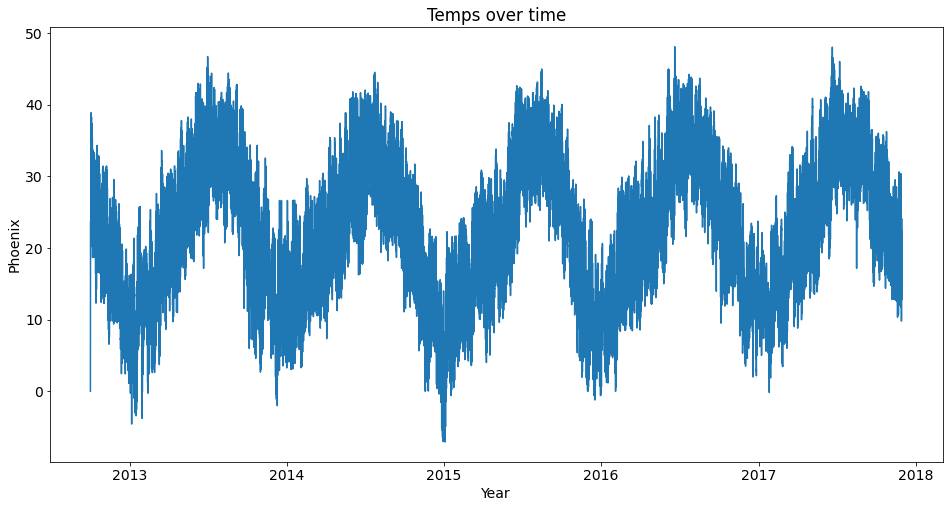

In [20]:
#plot one of the cities to see the data
plt.ylabel('Phoenix')
plt.xlabel('Year')
plt.title('Temps over time')
#plt.plot(resample_df.index, resample_df['Phoenix'])
plt.plot(new_df.index,new_df['Phoenix'])
plt.show()

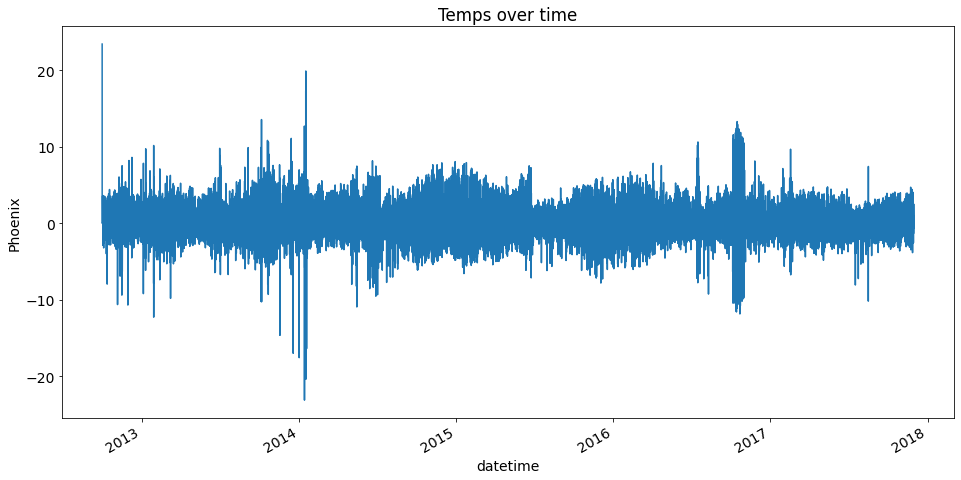

In [23]:
#to transform a stationary process
plt.ylabel('Phoenix')
plt.title('Temps over time')
chg_in_temp = new_df['Phoenix'].diff().dropna()
chg_in_temp.plot()
plt.show()

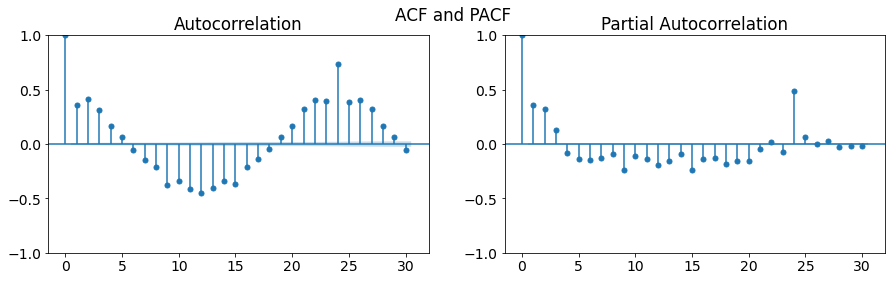

In [24]:
#plot the acf and pacf - still need to label

fig, axes = plt.subplots(1, 2, figsize=(15,4))
plt.suptitle('ACF and PACF')

fig = plot_acf(chg_in_temp, lags = 30, missing='drop',ax=axes[0])
fig = plot_pacf(chg_in_temp, lags = 30,method='ywm',ax=axes[1])


plt.show()

In [25]:
#find means for each value for each week
resample_df = new_df.resample('W').mean()
resample_df.head()

,Vancouver,Portland,San Francisco,Seattle,Los Angeles,San Diego,Las Vegas,Phoenix,Albuquerque,Denver,...,Boston,Beersheba,Tel Aviv District,Eilat,Haifa,Nahariyya,Jerusalem,month,7dayPhoenix,7dayJacksonville
datetime,,,,,,,,,,,,,,,,,,,,,
2012-10-07,11.782007,14.195389,19.130721,12.136347,21.355688,21.213293,25.921982,27.550233,17.738827,9.768438,...,16.546898,27.536948,27.315692,29.464231,26.981314,26.972308,26.079006,10.000000,27.680923,25.824387
2012-10-14,11.570833,12.492262,15.026220,12.884792,18.363393,18.788185,20.792500,24.593244,13.178452,9.010298,...,9.970714,26.290119,25.037262,27.189048,25.149524,25.149524,24.204405,10.000000,24.692759,22.705451
2012-10-21,10.766726,12.581905,18.237708,11.862708,21.791369,21.251399,20.793333,24.469315,14.418958,12.702232,...,13.090893,26.595714,25.478631,28.952054,26.465179,26.465179,26.013690,10.000000,24.399810,22.431698
2012-10-28,6.520387,7.938631,13.921310,7.239077,19.241905,17.976429,17.902887,22.128095,11.877976,7.690952,...,11.531964,24.897321,23.385149,24.985089,23.948214,23.948214,22.745357,10.000000,22.162082,22.145381
2012-11-04,10.706786,13.579613,14.973899,12.447649,17.534137,17.293095,17.326280,21.392500,11.461756,10.028036,...,11.412946,25.414702,23.994405,25.808780,25.580298,25.580298,24.528036,10.571429,21.391471,15.921071


## need to work on resample_df now instead

In [26]:
#run SARIMA model

mod_sarimax = sm.tsa.SARIMAX(resample_df['Phoenix'],order=(5,1,0), seasonal_order=(2,1,0,52))
res_sarimax = mod_sarimax.fit(low_memory=True)
print(res_sarimax.summary())

                                     SARIMAX Results                                      
Dep. Variable:                            Phoenix   No. Observations:                  270
Model:             SARIMAX(5, 1, 0)x(2, 1, 0, 52)   Log Likelihood                -527.401
Date:                            Wed, 08 Dec 2021   AIC                           1070.802
Time:                                    19:28:06   BIC                           1097.842
Sample:                                10-07-2012   HQIC                          1081.725
                                     - 12-03-2017                                         
Covariance Type:                           approx                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5592      0.068     -8.243      0.000      -0.692      -0.426
ar.L2         -0.3117      0.076   

In [27]:
res_sarimax.plot()

AttributeError: 'SARIMAXResults' object has no attribute 'plot'

<AxesSubplot:xlabel='datetime'>

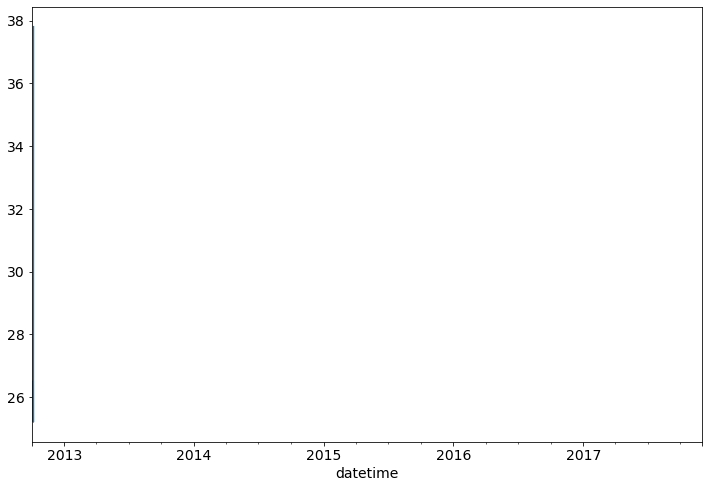

In [26]:
new_df['Phoenix']=results.predict(start=90,end=103,dynamic=True)
new_df['Phoenix'].plot(figsize=(12,8))

In [24]:
print(res_sarimax.aic)

154853.19167144797


Seems like a large AIC so probably not the best fit model


In [41]:
start_fore=max(new_df.index)
print(start_fore)

2017-11-30 00:00:00


In [31]:
mod = ARIMA(chg_in_temp, order=(2,0,1))
res = mod.fit()

In [42]:
res.forecast(start='2017-11-30', end='2021-12-31')


TypeError: statsmodels.tsa.statespace.mlemodel.MLEResults.predict() got multiple values for keyword argument 'start'

In [26]:
res_sarimax.plot_predict(start=max(new_df.index), end='2021-12-31')

AttributeError: 'SARIMAXResults' object has no attribute 'plot_predict'

In [60]:
forec=res_sarimax.predict(start=len(new_df['Phoenix']), end=len(new_df['Phoenix']))
#forec=res_sarimax.predict(start='2021-12-01', end='2021-12-31')

In [32]:
print(forec)

2017-11-30 01:00:00    24.481795
Freq: H, dtype: float64


## 8.	Explain what you see when you perform results.summary() on the cities in question 7. 




## Bonus:
What do GARCH and ARCH Stand for? Break down and explain each piece in the names. Explain the difference between the two. Create a GARCH and ARCH model on the same 5 cities from question 6. Explain and graph the results.

GARCH stands for Generalized Autoregressive Conditional Heteroskedasticity

ARCH stands for Autoregressive Conditionally Heteroscedastic. An ARCH model could be used for any series that has periods of increased or decreased variance.


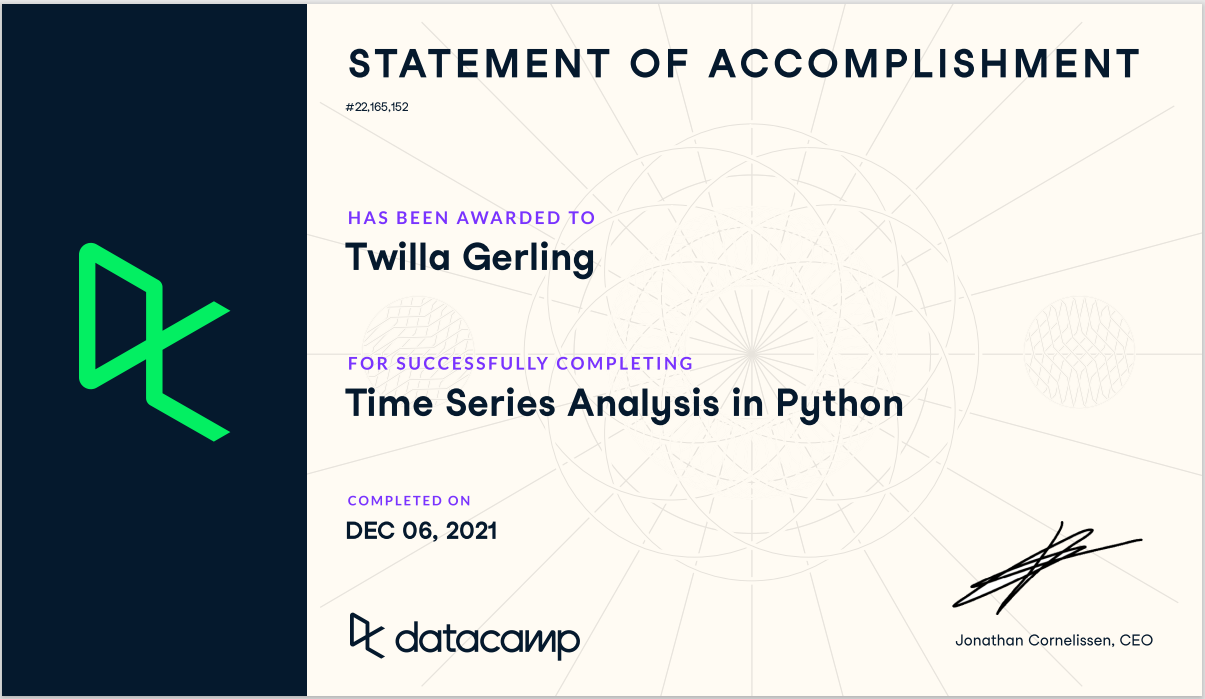